In [1]:
from datetime import datetime
import datetime as dt
import pytz
import seaborn as sns
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
import pandas as pd
import pytz
import numpy as np
import os

# Display MetaTrader5 package information
print(f"MetaTrader5 package version: {mt5.__version__}")
print(f"MetaTrader5 author: {mt5.__author__}")

# Initialize connection to the MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =", mt5.last_error())
    quit()

# Set the time zone to UTC
timezone = pytz.timezone("Etc/UTC")
lst_ = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'AUDUSD', 'USDCAD', 'NZDUSD','EURGBP', 'EURAUD', 'EURJPY', 'GBPJPY', 'AUDJPY', 'CADJPY', 'CHFJPY',
        'NZDJPY', 'GBPAUD', 'GBPCAD', 'AUDCHF', 'AUDCAD', 'AUDNZD', 'EURNZD','GBPNZD', 'CADCHF', 'NZDCAD', 'NZDCHF', 'EURCHF', 'EURCAD', 'AUDSGD', 'CADSGD', 'CHFJPY', 'NZDSGD']

dict_ = {}

for symbol in lst_:
    # Define the date and time range for historical data (weekly version)
    days_offset = dt.timedelta(weeks=48)
    local_time = dt.datetime.today()

    # Calculate the start and end dates for the weekly range in UTC
    utc_from = local_time - days_offset
    utc_to = local_time

    # Get historical price data for the symbol on a daily timeframe
    timeframe = mt5.TIMEFRAME_D1
    rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)

    # Check if data retrieval was successful
    if rates is not None and len(rates) > 0:
        # Create a DataFrame from the obtained data
        df = pd.DataFrame(rates)

        # Convert time in seconds to 'datetime' format
        df['time'] = pd.to_datetime(df['time'], unit='s')

        # Store the DataFrame in the dictionary
        dict_[f'df_30_{symbol}'] = df
    else:
        print(f"Failed to retrieve data for {symbol}")

# Shut down the connection to the MetaTrader 5 terminal
mt5.shutdown()

# Display the first 10 elements of the obtained data for each currency pair
for key, df in dict_.items():
    print(f"\nData for {key}:")
    print(df.head(10))


MetaTrader5 package version: 5.0.45
MetaTrader5 author: MetaQuotes Ltd.

Data for df_30_EURUSD:
        time     open     high      low    close  tick_volume  spread  \
0 2023-01-02  1.06934  1.07069  1.06505  1.06594        20676       2   
1 2023-01-03  1.06645  1.06833  1.05194  1.05486       109398       2   
2 2023-01-04  1.05457  1.06351  1.05405  1.06035       110740       2   
3 2023-01-05  1.06018  1.06313  1.05151  1.05218       100291       2   
4 2023-01-06  1.05214  1.06480  1.04820  1.06428        94954       2   
5 2023-01-09  1.06386  1.07606  1.06370  1.07326        92207       2   
6 2023-01-10  1.07280  1.07593  1.07120  1.07340        95712       2   
7 2023-01-11  1.07322  1.07763  1.07254  1.07562        75663       2   
8 2023-01-12  1.07538  1.08667  1.07293  1.08506       120746       0   
9 2023-01-13  1.08440  1.08679  1.07805  1.08325        94916       1   

   real_volume  
0            0  
1            0  
2            0  
3            0  
4            0 

In [2]:
df_close = pd.concat([dict_[i]['close'] for i in dict_.keys() if 'JPY' not in i], axis='columns')

In [3]:
df_close.columns = [i for i in lst_ if 'JPY' not in i]

In [4]:
corr_close = df_close.corr()
corr_close.to_excel('C:\\Users\\morara\\correlation\\Corr_Annual.xlsx')

In [5]:
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]>0.75].dropna()

with open('C:/Users/morara/correlation/High_Annualcorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')

In [6]:
dict2_={}
for i in corr_close.columns:
    dict2_[i]=corr_close[i][corr_close[i]<0.3].dropna()

with open('C:/Users/morara/correlation/Negative_Annualcorr.txt', 'w') as f:
    for i in dict2_.keys():
        f.write(str(dict2_[i])+'\n')

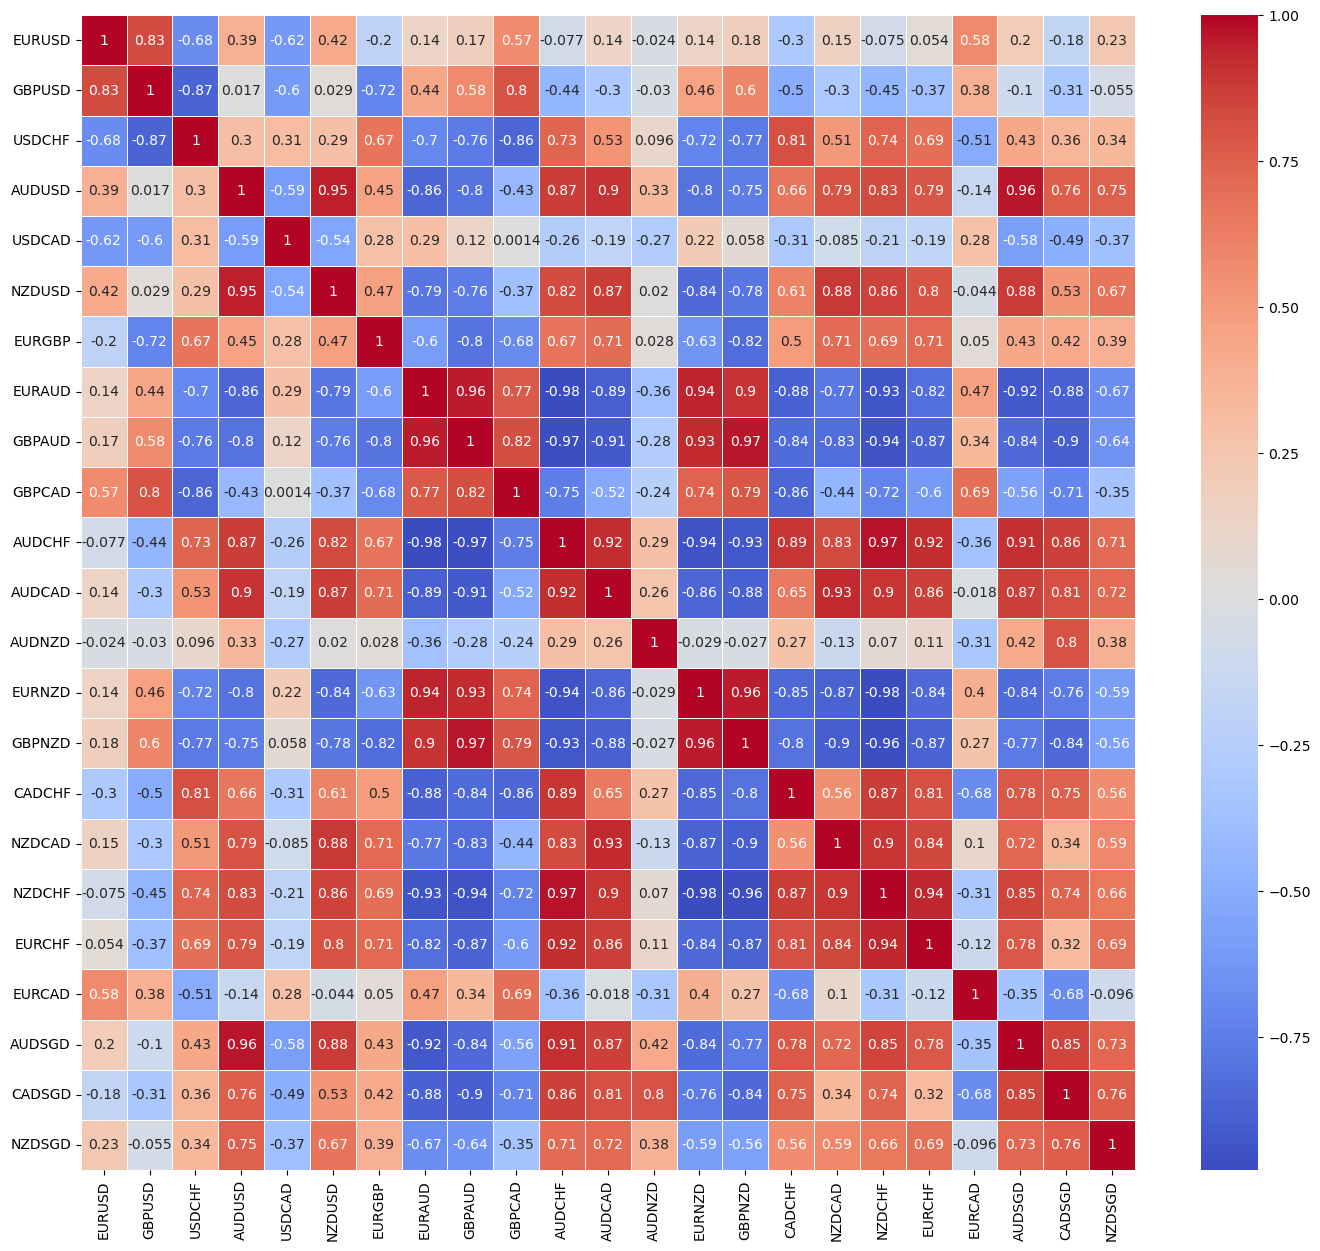

In [7]:
fig, ax = plt.subplots(figsize=(17,15))
hm = sns.heatmap(corr_close, annot=True,cmap='coolwarm', linewidths=0.5, ax=ax)
folder_path = 'C:\\Users\\morara\\correlation\\'
file_name = 'my_Corr-Annual.jpg'  # Change the file format to your preference (.png, .jpg, .pdf, etc.)
plt.savefig(os.path.join(folder_path, file_name))  # Use os.path.join to combine folder_path and file_name
plt.show();